[Coding: Navigating through #000000 and #ffffff: Color Theory in Python](https://thingsgrow.me/2020/01/02/navigating-through-000000-and-ffffff-color-theory-in-python/)

In [133]:
import matplotlib.pyplot as plt
import colorsys
 
def rgb2hex(val):
    """
    Takes tuple and converts to hex value.
    """
    conversion = '#%02x%02x%02x' % val
    return conversion
 
def hex2rgb(val):
    """
    Takes hex string and converts to rgb tuple.
    """
    hexNum = val.strip('#')
    hexLen = len(hexNum)
    conversion = tuple(int(hexNum[i:i+hexLen//3], 16) for i in range(0, hexLen, hexLen//3))
    return conversion

In [134]:
def complementary(val:tuple[int,int,int])->tuple[int,int,int]:
    """
    Takes rgb tuple and produces complimentary color.
    """
    #value has to be 0 < x 1 in order to convert to hls
    r, g, b = map(lambda x: x/255.0, val)
    #hls provides color in radial scale
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    #get hue changes at 150 and 210 degrees
    deg_180_hue = h + (180.0 / 360.0)
    color_180_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_180_hue, l, s)))
    return color_180_rgb

In [135]:
rgb_eden=hex2rgb('#0f383e')
hexVal=rgb2hex(complementary(rgb_eden))

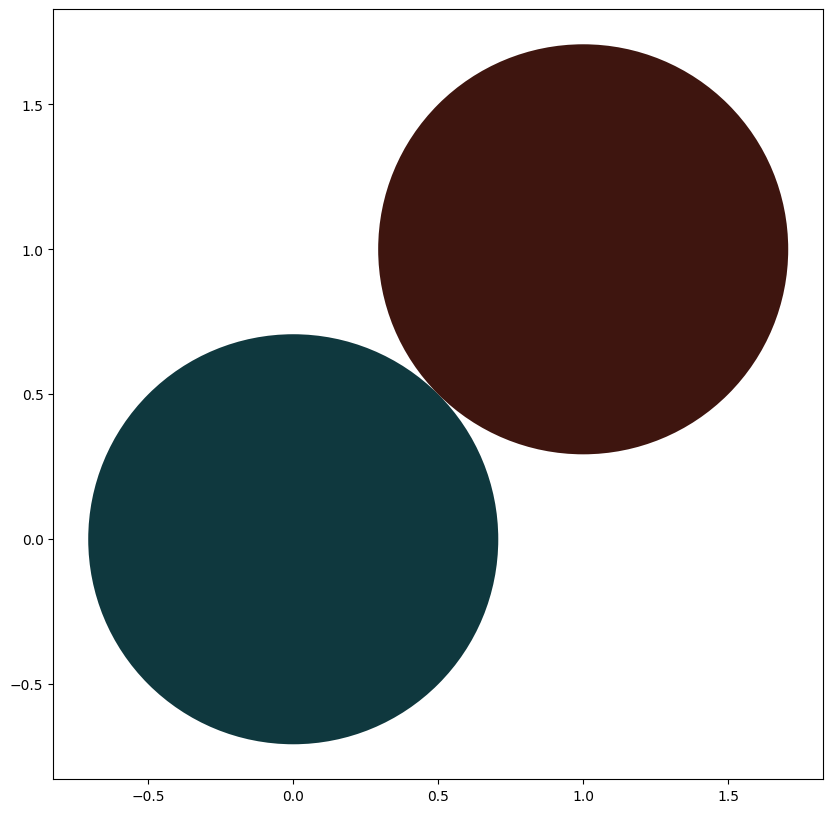

In [136]:
import math
#Visualize Colors
edenHex = rgb2hex(rgb_eden)
fig = plt.gcf()
fig.set_size_inches(10, 10, forward=True)
 
plt.axes()
 
circle = plt.Circle((0, 0), radius=math.sqrt(2)/2, fc=edenHex)
circle2 = plt.Circle((1, 1), radius=math.sqrt(2)/2, fc=hexVal)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
 
plt.axis('scaled')
plt.show()

In [137]:
def show_two_colors(a:str,b:str)->None:
    fig = plt.gcf()
    fig.set_size_inches(10, 10, forward=True)
 
    plt.axes()
 
    circle = plt.Circle((0, 0), radius=math.sqrt(2)/2, fc=a)
    circle2 = plt.Circle((1, 1), radius=math.sqrt(2)/2, fc=b)
    plt.gca().add_patch(circle)
    plt.gca().add_patch(circle2)
 
    plt.axis('off')
    plt.show()

def show_complement_color(c:str)->None:
    cc=hex2rgb(c)
    cc=complementary(cc)
    cc=rgb2hex(cc)
    show_two_colors(c,cc)

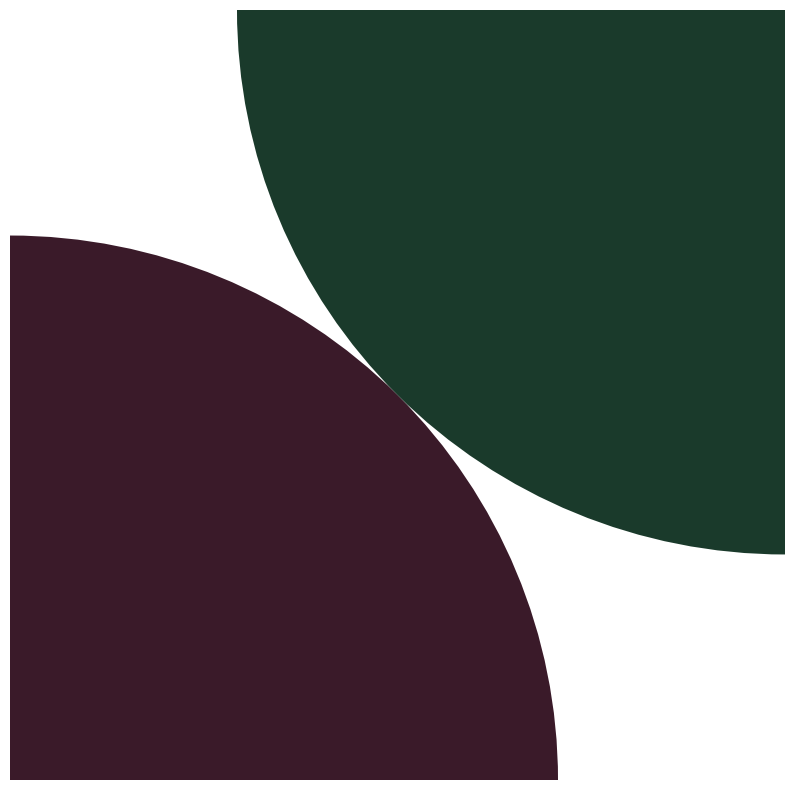

In [138]:
show_complement_color('#3a1a29')

In [139]:
def rgb_distance(rgb1, rgb2):
    rm = 0.5 * (rgb1[0] + rgb2[0])
    rd = ((2 + rm) * (rgb1[0] - rgb2[0])) ** 2
    gd = (4 * (rgb1[1] - rgb2[1])) ** 2
    bd = ((3 - rm) * (rgb1[2] - rgb2[2])) ** 2
    return (rd + gd + bd) ** 0.5

def hex_distance(hex1:str,hex2:str)->float:
    return rgb_distance(hex2rgb(hex1),hex2rgb(hex2))

In [140]:
rgb1=hex2rgb('#a6d879')
#rgb2=complementary(rgb1)
rgb2=hex2rgb('#6b3a00')
rgb_distance(rgb1,rgb2)

18113.762682005083

In [141]:
print(rgb1,rgb2)

(166, 216, 121) (107, 58, 0)


In [142]:
rgb1=(0,0,0)
rgb2=(255,255,255)
rgb_distance(rgb1,rgb2)

45819.533634684674

In [143]:
def splitComplementary(val):
    """
    Takes rgb tuple and produces list of split complimentary colors.
    """
    #value has to be 0 <span id="mce_SELREST_start" style="overflow:hidden;line-height:0;"></span>&lt; x 1 in order to convert to hls
    r, g, b = map(lambda x: x/255.0, val)
    #hls provides color in radial scale
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    #get hue changes at 150 and 210 degrees
    deg_150_hue = h + (150.0 / 360.0)
    deg_210_hue = h + (210.0 / 360.0)
    #convert to rgb
    color_150_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_150_hue, l, s)))
    color_210_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_210_hue, l, s)))
    return [color_150_rgb, color_210_rgb]


In [144]:
def analogous(val, d):
    """
    Takes rgb tuple and angle (out of 100) and produces list of analogous colors)
    """
    analogous_list = []
    #set color wheel angle
    d = d /360.0
    #value has to be 0 <span id="mce_SELREST_start" style="overflow:hidden;line-height:0;"></span>&lt; x 1 in order to convert to hls
    r, g, b = map(lambda x: x/255.0, val)
    #hls provides color in radial scale
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    #rotate hue by d
    h = [(h+d) % 1 for d in (-d, d)]
    for nh in h:
        new_rgb = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(nh, l, s)))
        analogous_list.append(new_rgb)
    return analogous_list

In [145]:
def triadic(val):
    """
    Takes rgb tuple and produces list of triadic colors.
    """
    #value has to be 0 < x 1 in order to convert to hls
    r, g, b = map(lambda x: x/255.0, val)
    #hls provides color in radial scale
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    #get hue changes at 120 and 240 degrees
    deg_120_hue = h + (120.0 / 360.0)
    deg_240_hue = h + (240.0 / 360.0)
    #convert to rgb
    color_120_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_120_hue, l, s)))
    color_240_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_240_hue, l, s)))
    return [color_120_rgb, color_240_rgb]

In [146]:
def tetradic(val):
    """
    Takes rgb tuple and produces list of tetradic colors.
    """
    #value has to be 0 <span id="mce_SELREST_start" style="overflow:hidden;line-height:0;"></span>&lt; x 1 in order to convert to hls
    r, g, b = map(lambda x: x/255.0, val)
    #hls provides color in radial scale
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    #get hue changes at 120 and 240 degrees
    deg_60_hue = h + (60.0 / 360.0)
    deg_180_hue = h + (180.0 / 360.0)
    deg_240_hue = h + (240.0 / 360.0)
    #convert to rgb
    color_60_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_60_hue, l, s)))
    color_180_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_180_hue, l, s)))
    color_240_rgb = tuple(map(lambda x: round(x * 255),colorsys.hls_to_rgb(deg_240_hue, l, s)))
    return [color_60_rgb, color_180_rgb, color_240_rgb]

In [147]:
import colormap

In [148]:
colormap.rgb2hex(int(256/2),int(256/2),int(256/2))

'#808080'

In [149]:
def gray(level:int)->list[int]:
    return tuple(map(lambda x:int(x),[256/level,256/level,256/level]))

In [150]:
rgb2hex(gray(3))

'#555555'

In [151]:
colorsys.rgb_to_hls(0,0,0)

(0.0, 0.0, 0.0)

In [152]:
colorsys.rgb_to_hls(255,255,255)

(0.0, 255.0, 0.0)

In [153]:
complementary((10,0,0))

(0, 10, 10)

In [154]:
complementary((255,255,255))

(255, 255, 255)

In [155]:
r,g,b=complementary((10,0,0))
colorsys.rgb_to_hls(r,g,b)

(0.5, 5.0, -1.25)

In [156]:
def rgb_complement(c:tuple[int,int,int])->tuple[int,int,int]:
    return tuple(map(lambda x:255-x,c))

In [157]:
rgb_complement((0,0,0))

(255, 255, 255)

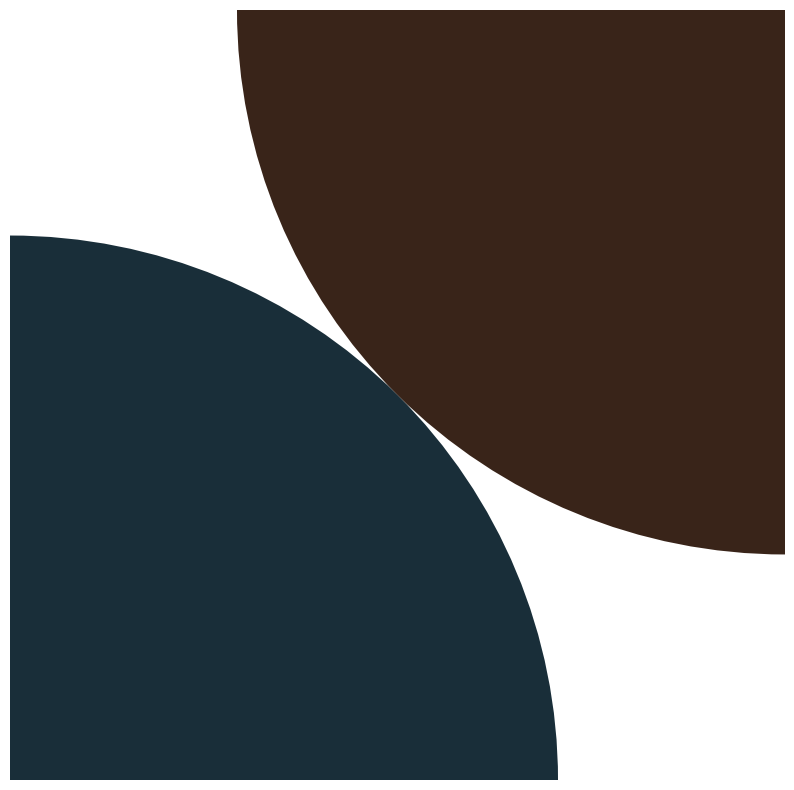

In [158]:
hex1='#192E39'
hex2=rgb2hex(complementary(hex2rgb(hex1)))
show_two_colors(hex1,hex2)

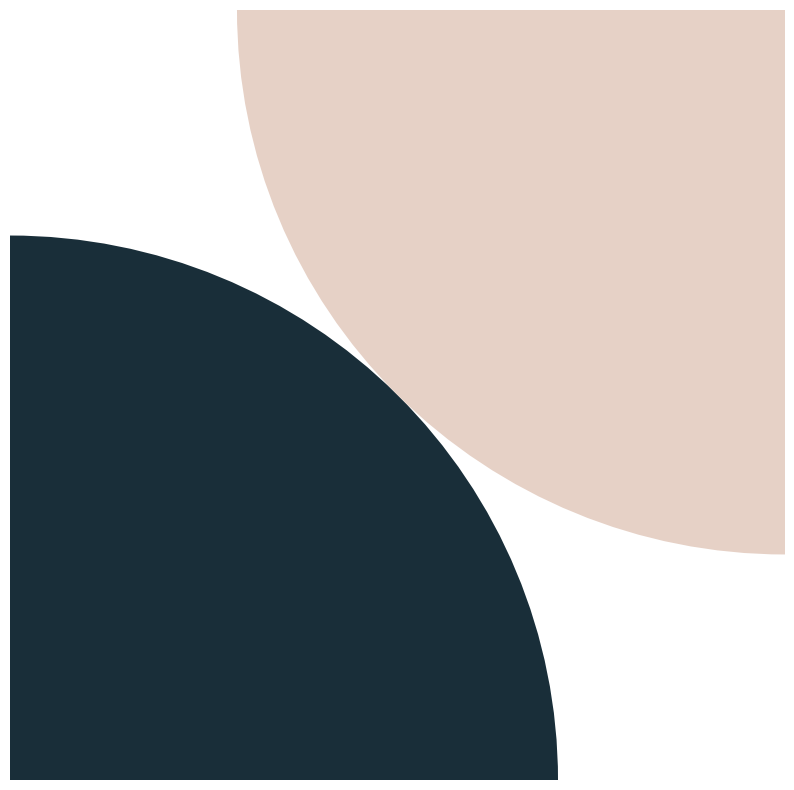

In [159]:
hex1='#192E39'
hex2=rgb2hex(rgb_complement(hex2rgb(hex1)))
show_two_colors(hex1,hex2)

In [160]:
rgb1=hex2rgb(hex1)
rgb2=hex2rgb(hex2)
print(rgb1+rgb2)

(25, 46, 57, 230, 209, 198)


In [161]:
def rgb_add(a:tuple[int,int,int],b:tuple[int,int,int])->tuple[int,int,int]:
    return tuple(map(lambda x:x[0]+x[1],zip(a,b)))

In [162]:
rgb_add(rgb1,rgb2)

(255, 255, 255)

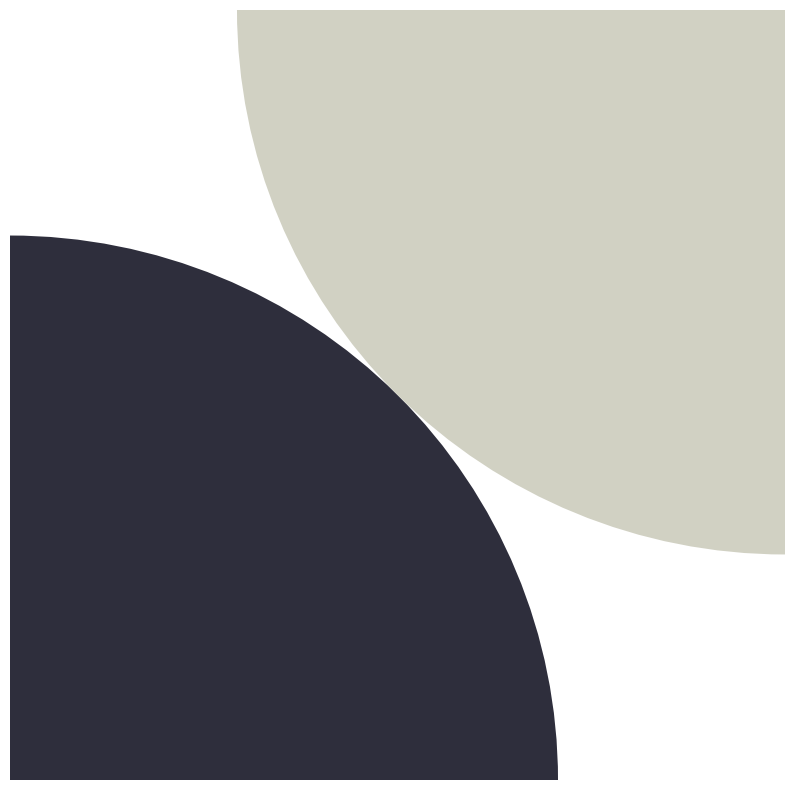

In [163]:
hex1='#2E2E3C'
hex2=rgb2hex(rgb_complement(hex2rgb(hex1)))
show_two_colors(hex1,hex2)

In [164]:
hex2

'#d1d1c3'

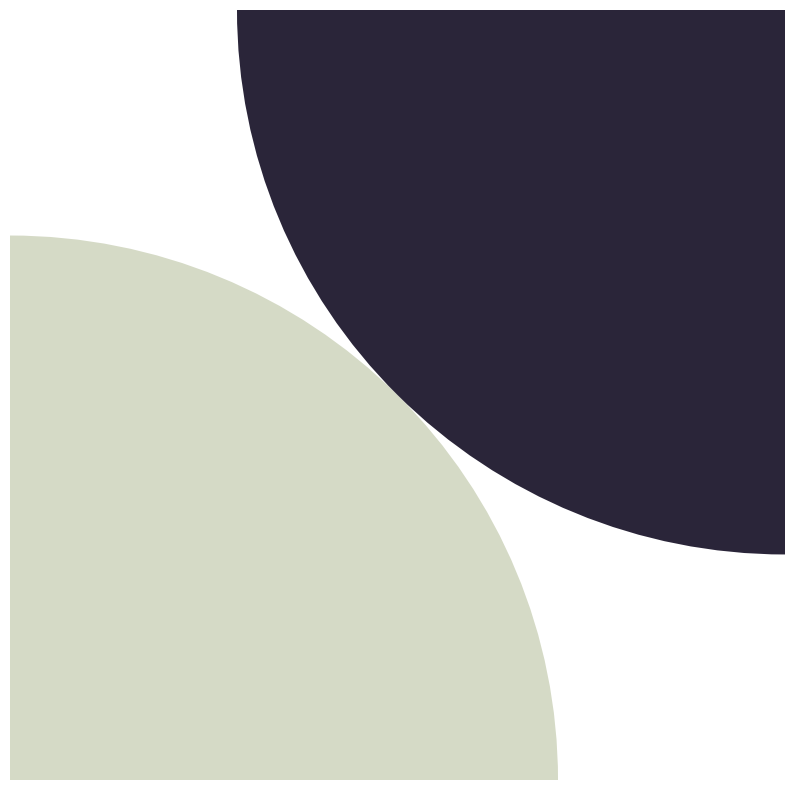

In [165]:
hex1='#D5DAC6'
hex2=rgb2hex(rgb_complement(hex2rgb(hex1)))
show_two_colors(hex1,hex2)

In [166]:
hex2

'#2a2539'

## The color teal

In [168]:
hex_teal='#008080'
rgb_teal=hex2rgb(hex2)
rgb_teal_c=rgb_complement(rgb_teal)
hex_teal_c=rgb2hex(rgb_teal_c)

### Complementary

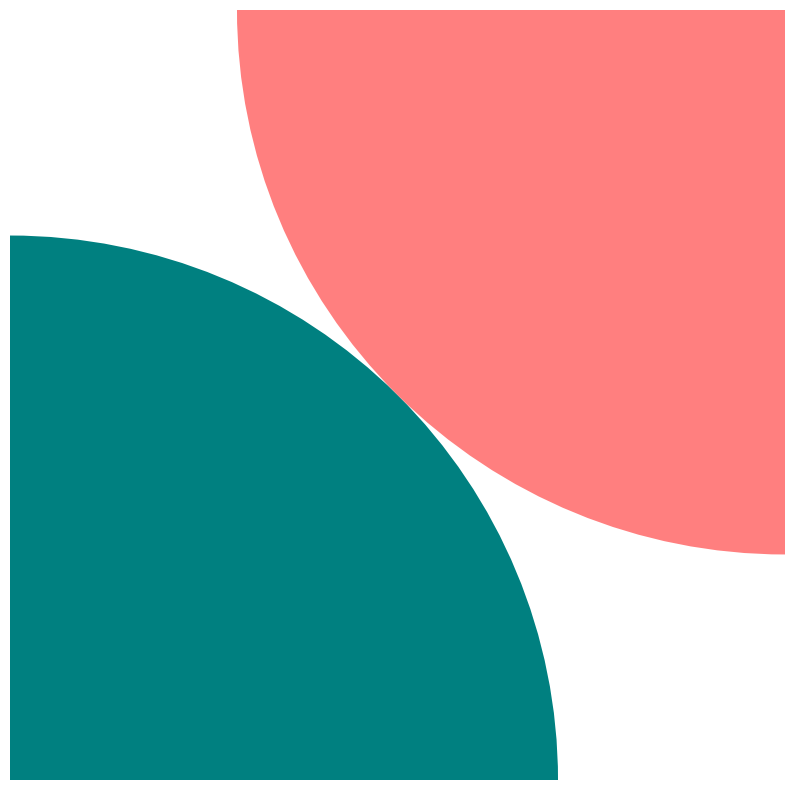

In [167]:
hex1='#008080'
hex2=rgb2hex(rgb_complement(hex2rgb(hex1)))
show_two_colors(hex1,hex2)

### Split complementary

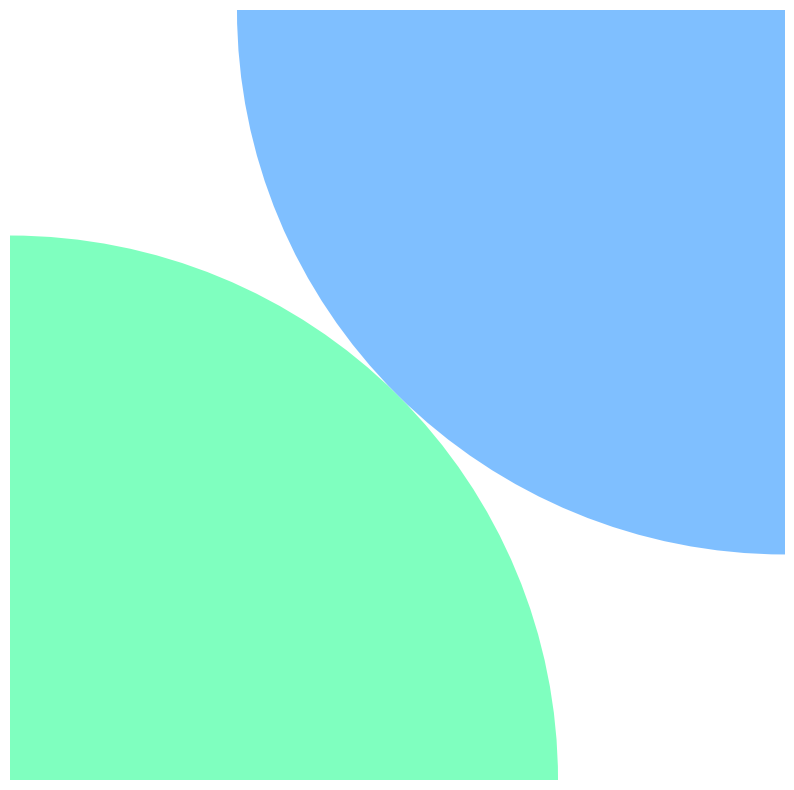

In [169]:
rgb_teal_sc1,rgb_teal_sc2=splitComplementary(rgb_teal)
hex_teal_sc1=rgb2hex(rgb_teal_sc1)
hex_teal_sc2=rgb2hex(rgb_teal_sc2)
show_two_colors(hex_teal_sc1,hex_teal_sc2)

### Tetradic

In [170]:
tmp=tetradic(rgb_teal)
rgb_teal_t1,rgb_teal_t2,rgb_teal_t3=tmp
hex_teal_t1,hex_teal_t2,hex_teal_t3=tuple(map(lambda x:rgb2hex(x),tmp))

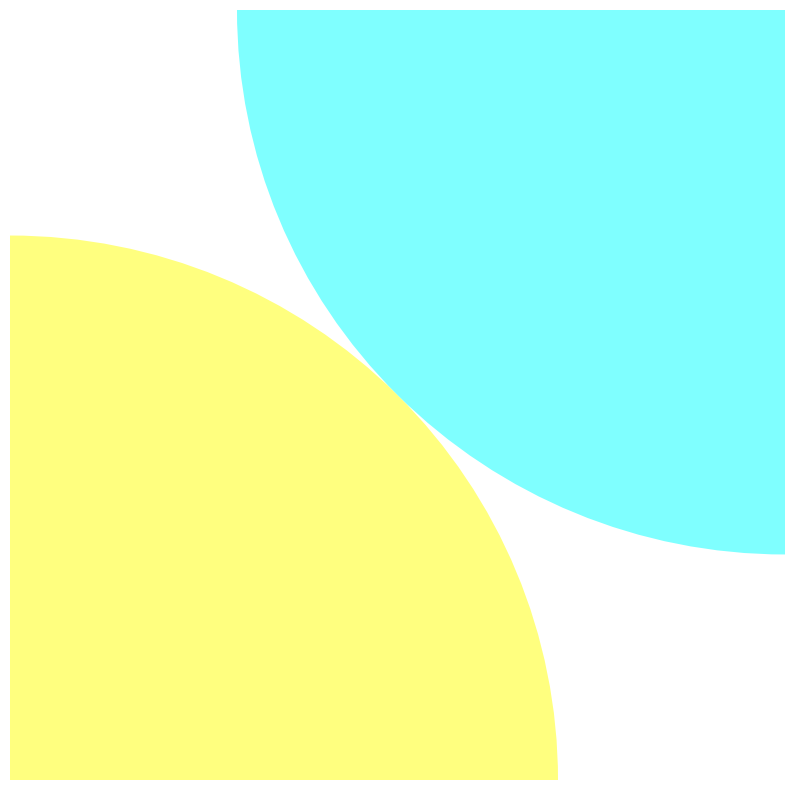

In [171]:
show_two_colors(hex_teal_t1,hex_teal_t2)

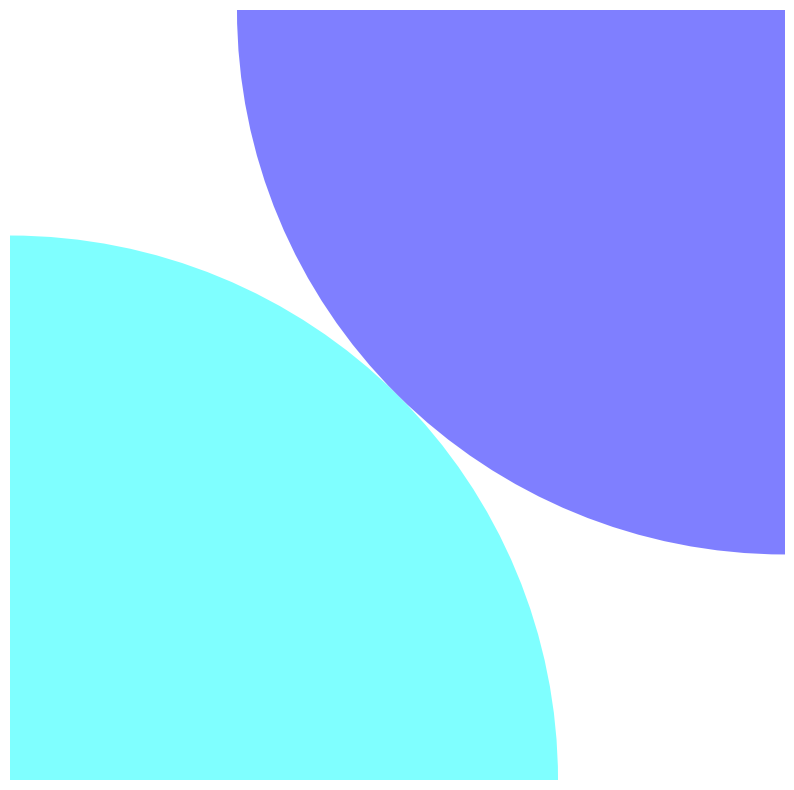

In [172]:
show_two_colors(hex_teal_t2,hex_teal_t3)